# Sentiment Analyse

Um die Ergebnisse der Sentiment-Analyse zu betrachten werden zunächst wie gewohnt die benötigten Packages importiert und die Daten in ein ´pandas`-Dataframe geladen.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
articles_data = pd.read_csv('2-4-data-extended-keywords-sentiment.csv')
articles = pd.DataFrame(articles_data)
articles.head()

,date,time,category,headline,text,upload,upload-hour,weekday,length,keywords,sentiment_headline,sentiment_text,sentiment_prob_headline_positive,sentiment_prob_headline_negative,sentiment_prob_headline_neutral,sentiment_prob_text_positive,sentiment_prob_text_negative,sentiment_prob_text_neutral
0,2024-05-10,17:14:00,politik,Gruppen treten am Vatertag mit Nazi Symbolik auf,Am Vatertag steuern Männer ein altes Militärfa...,2024-05-10 17:14:00,17,Friday,2908,"Politik, Gesellschaft, Extremismus, Rechtsextr...",neutral,neutral,0.000229,0.000604,0.999167,0.001950,0.010997,0.987053
1,2024-05-10,17:16:00,politik,Peking schimpft ueber US Zerstoerer im Suedchi...,China beansprucht die Paracel-Inseln im Südchi...,2024-05-10 17:16:00,17,Friday,3504,"China, USA, Paracel-Inseln, Südchinesisches Me...",negative,neutral,0.026734,0.750409,0.222857,0.002821,0.010704,0.986475
2,2024-05-10,19:33:00,politik,SPD Politiker Ecke schildert Sekunden der Prue...,Der vor einer Woche brutal attackierte SPD-Pol...,2024-05-10 19:33:00,19,Friday,2445,"Politik, Gewalt gegen Politiker, SPD, Wahlkamp...",negative,negative,0.005901,0.979033,0.015065,0.019161,0.757548,0.223291
3,2024-05-10,08:40:00,politik,Landkreise fordern haertere Buergergeld Sankti...,Beim Bürgergeld in seiner jetzigen Form bemäng...,2024-05-10 08:40:00,8,Friday,2984,"Bürgergeld, Landkreistag, Vermögensregelungen,...",neutral,neutral,0.000009,0.000026,0.999965,0.002032,0.010209,0.987759
4,2024-05-10,15:44:00,politik,Buschmanns Regierungsflieger kehrt in Parkposi...,Deutsche Regierungsflieger sind für ihre Panne...,2024-05-10 15:44:00,15,Friday,2570,"Regierungsflugzeug, Technikproblem, Verzögerun...",neutral,negative,0.000084,0.000253,0.999663,0.012173,0.830547,0.157280


Für die Darstellung wird eine Funktion definiert, die die benötigten Plots erstellt.

In [46]:
def create_sentiment_result_plot(df, column):
    sentiment_count = []
    for sentiment_class, count in df[column].value_counts().items():
        sentiment_count.append( (sentiment_class, count) )
    labels, values = zip(*sentiment_count)
    plt.xlabel('Sentiment class')
    plt.ylabel('Count')
    plt.title(f'Sentiment analyse of {column}')
    plt.bar(labels, values)
    for i, value in enumerate(values):
        print(i, value)
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
    plt.show()

0 8722
1 1688
2 268


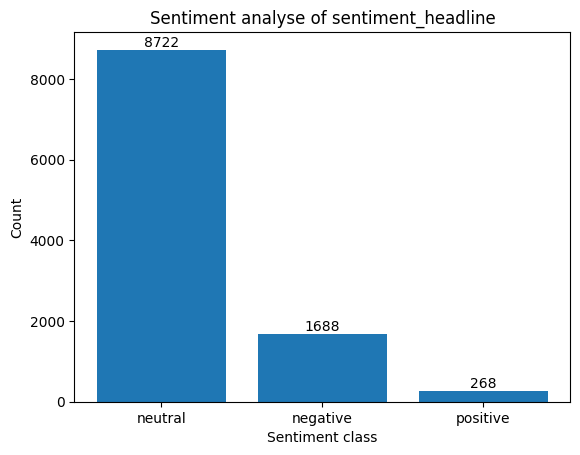

In [47]:
create_sentiment_result_plot(articles, "sentiment_headline")

0 9083
1 1561
2 34


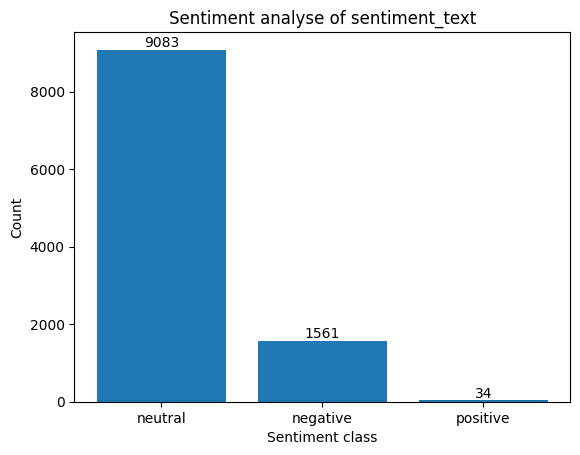

In [48]:
create_sentiment_result_plot(articles, "sentiment_text")

Zu sehen ist, dass ein Großteil der Nachrichten als `neutral` klassifiziert wurden, was für einen neutralen Nachrichtensender entsprechend wünschenswert ist. Dennoch wurde auch ein nicht zu vernachlässigenderer Teil der Überschriften als `negativ` klassifiziert. Positive Überschriften gibt es hingegend nur sehr wenige. Betrachtet man nicht die Überschriften, sondern die Texte, ist ein noch größerer Teil der Überschriften `neutral` und so gut wie keine positiven Artikel.

Als nächstes werden die Ergebnisse der Sentiment-Analyse gruppiert nach den einzelnen Kategorien untersucht.

In [12]:
def create_category_result_plot(df, column, relative=False):
    categories = []
    category_count = []
    negatives = []
    neutrals = []
    positives = []
    for category, count in articles['category'].value_counts().items():
        negatives.append(articles[column][(articles.sentiment_text == 'negative') & (articles.category == category)].count())
        neutrals.append(articles[column][(articles.sentiment_text == 'neutral') & (articles.category == category)].count())
        positives.append(articles[column][(articles.sentiment_text == 'positive') & (articles.category == category)].count())
        categories.append(category)
    if relative:
        for i, category in enumerate(categories):
            count = articles[column][(articles.category == category)].count()
            negatives[i] = negatives[i] / count
            positives[i] = positives[i] / count
            neutrals[i] = neutrals[i] / count
    ind = np.arange(len(categories))
    fig, ax = plt.subplots()
    p1 = ax.bar(ind, positives, label='Positiv', color='seagreen')
    p2 = ax.bar(ind, neutrals, bottom=positives, label='Neutral', color='cornflowerblue')
    p3 = ax.bar(ind, negatives, bottom=[i+j for i,j in zip(positives, neutrals)], label='Negativ', color='lightcoral')
    ax.set_xlabel('Kategorien')
    ax.set_ylabel('Anteile')
    ax.set_xticks(ind)
    ax.set_xticklabels(categories)
    plt.xticks(rotation=90)
    ax.legend()
    plt.tight_layout()
    plt.show()

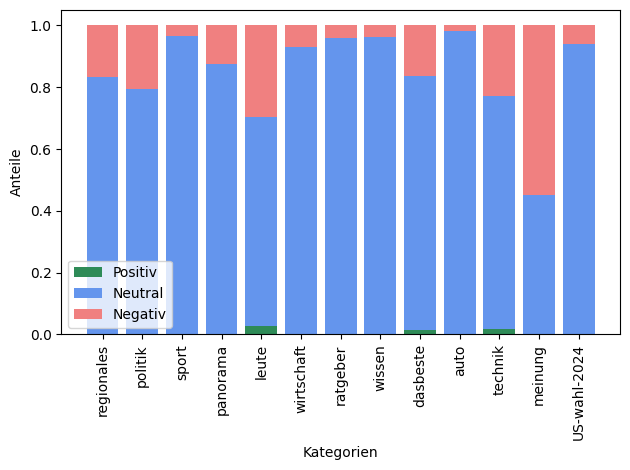

In [13]:
create_category_result_plot(articles, 'sentiment_headline', relative=True)

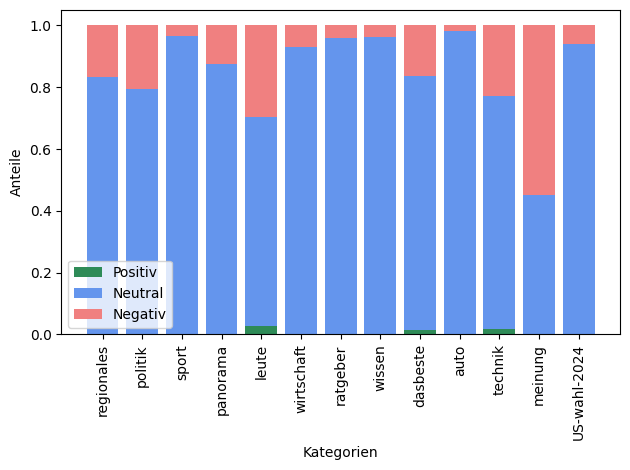

In [14]:
create_category_result_plot(articles, 'sentiment_text', relative = True)

In [69]:
def create_bar_chart_for_count_of_negative_articles_per_weekday(articles):
    negative_articles = articles[articles["sentiment_text"] == "negative"]
    negative_count_by_category = negative_articles.groupby("category").size()
    negative_count_by_category.plot(kind="bar", color="red", alpha=0.7)
    plt.title('Count of negative articles per category')
    plt.xlabel('category')
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

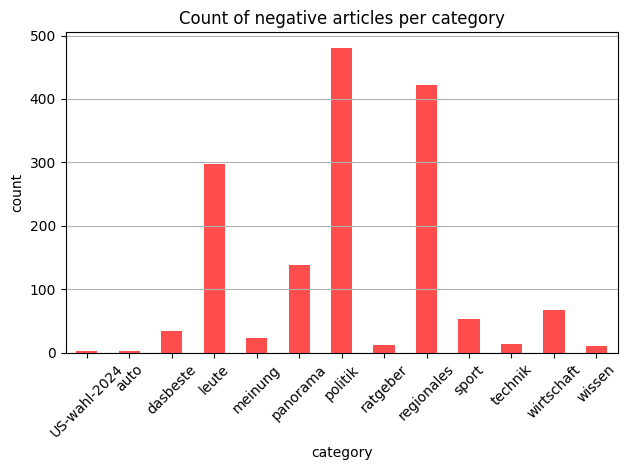

In [70]:
create_bar_chart_for_count_of_negative_articles_per_weekday(articles)

In [71]:
def create_bar_chart_for_percentage_of_negative_articles_per_weekday(articles):
    grouped = articles.groupby("weekday")["sentiment_text"].value_counts(normalize=True).unstack()
    grouped["negative_share"] = grouped["negative"] * 100
    grouped["negative_share"].plot(kind="bar", color="red", alpha=0.6)
    plt.title('Percentage of negative articles per weekday')
    plt.xlabel('weekday')
    plt.ylabel('percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

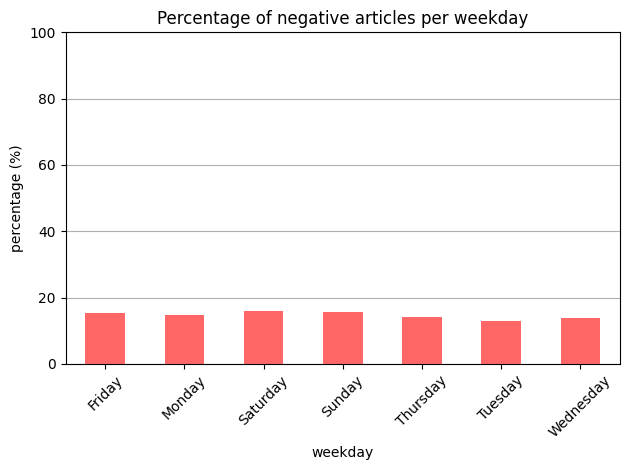

In [72]:
create_bar_chart_for_percentage_of_negative_articles_per_weekday(articles)

Hier können keine Auffälligkeiten festgestellt werden. Der Anteil an Artikeln mit negativem Sentiment ist bei allen Wochentagen ungefähr gleich.

In [73]:
def create_bar_chart_for_percentage_of_neutral_articles_per_weekday(articles):
    grouped = articles.groupby("weekday")["sentiment_text"].value_counts(normalize=True).unstack()
    grouped["neutral_share"] = grouped["neutral"] * 100
    grouped["neutral_share"].plot(kind="bar", color="blue", alpha=0.6)
    plt.title('Percentage of neutral articles per weekday')
    plt.xlabel('weekday')
    plt.ylabel('percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

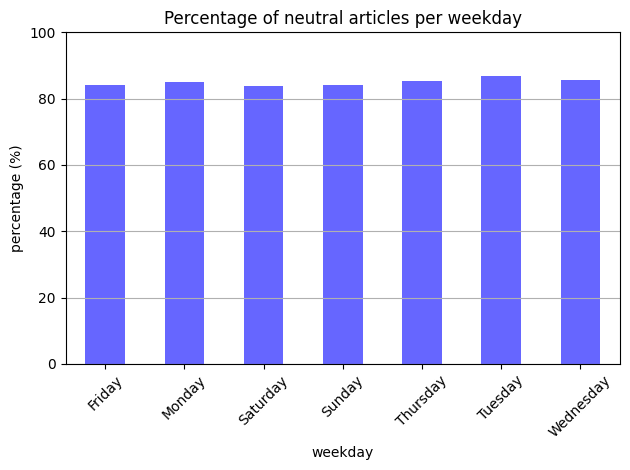

In [74]:
create_bar_chart_for_percentage_of_neutral_articles_per_weekday(articles)

Das gleiche gilt auch für die neutralen Artikel, wie im obigen Diagramm zu sehen ist. Dementsprechend muss es auch für die positiven Artikel gelten.

Betrachtet werden soll dennoch noch eine einzelne Kategorie, in der es viele negative Artikel gibt, um diese nach Auffälligkeiten zu durchsuchen. Gewählt wird hier die Kategorie `politik`.

In [60]:
def create_bar_chart_for_negative_articles_per_weekday_for_politics(articles):
    negative_politik_articles = articles[(articles["category"] == "politik") & (articles["sentiment_text"] == "negative")]
    negative_count_by_weekday = negative_politik_articles.groupby("weekday", observed=False).size()
    ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
    negative_count_by_weekday = negative_count_by_weekday.reindex(ordered_days)
    negative_count_by_weekday.plot(kind="bar", color="red", alpha=0.6)
    plt.title('Anzahl der negativen Artikel pro Wochentag (Kategorie "politik")')
    plt.xlabel('Wochentag')
    plt.ylabel('Anzahl der negativen Artikel')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

Jedoch zeigen sich auch hier keine nennenswerten Auffälligkeiten.

In [66]:
def create_bar_chart_for_count_of_negative_articles_per_hour_of_politics(articles):
    negative_politik_articles = articles[(articles["category"] == "politik") & (articles["sentiment_text"] == "negative")]
    negative_count_by_hour = negative_politik_articles.groupby("upload-hour", observed=False).size()
    all_hours = range(24)
    negative_count_by_hour = negative_count_by_hour.reindex(all_hours, fill_value=0)
    negative_count_by_hour.plot(kind="bar", color="red", alpha=0.7)
    plt.title('Count of negative articles per hour of category "politik"')
    plt.xlabel('hour')
    plt.ylabel('count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

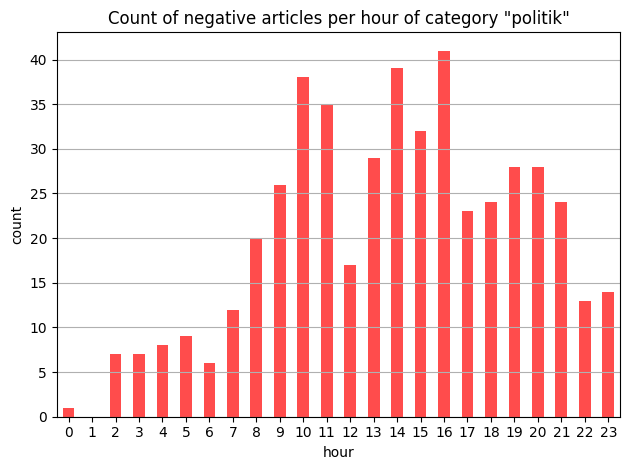

In [67]:
create_bar_chart_for_count_of_negative_articles_per_hour_of_politics(articles)

In [64]:
def create_bar_chart_for_relative_count_of_negative_articles_per_hour_of_politics(articles):
    politik_articles = articles[articles["category"] == "politik"]
    total_count_by_hour = politik_articles.groupby("upload-hour", observed=False).size()
    negative_count_by_hour = politik_articles[politik_articles["sentiment_text"] == "negative"].groupby("upload-hour").size()
    all_hours = range(24)
    total_count_by_hour = total_count_by_hour.reindex(all_hours, fill_value=0)
    negative_count_by_hour = negative_count_by_hour.reindex(all_hours, fill_value=0)
    negative_share_by_hour = (negative_count_by_hour / total_count_by_hour).fillna(0) * 100
    negative_share_by_hour.plot(kind="bar", color="red", alpha=0.6)
    plt.title('Anteil der negativen Artikel pro Stunde (Kategorie "politik")')
    plt.xlabel('Stunde')
    plt.ylabel('Anteil der negativen Artikel (%)')
    plt.xticks(rotation=0)
    plt.ylim(0, 100)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

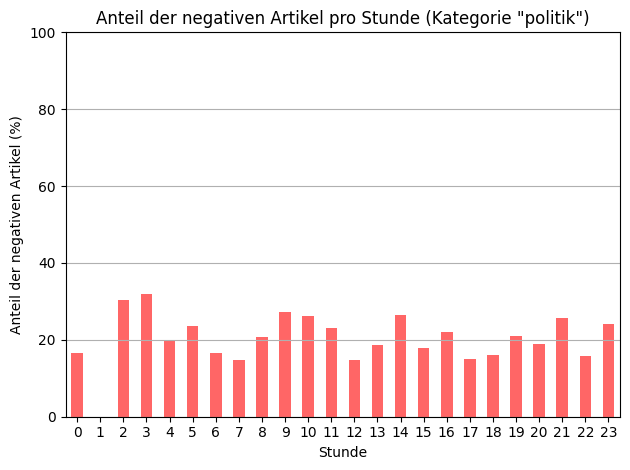

In [65]:
create_bar_chart_for_relative_count_of_negative_articles_per_hour_of_politics(articles)